# Red Wine Quality Prediction Project

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier




In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

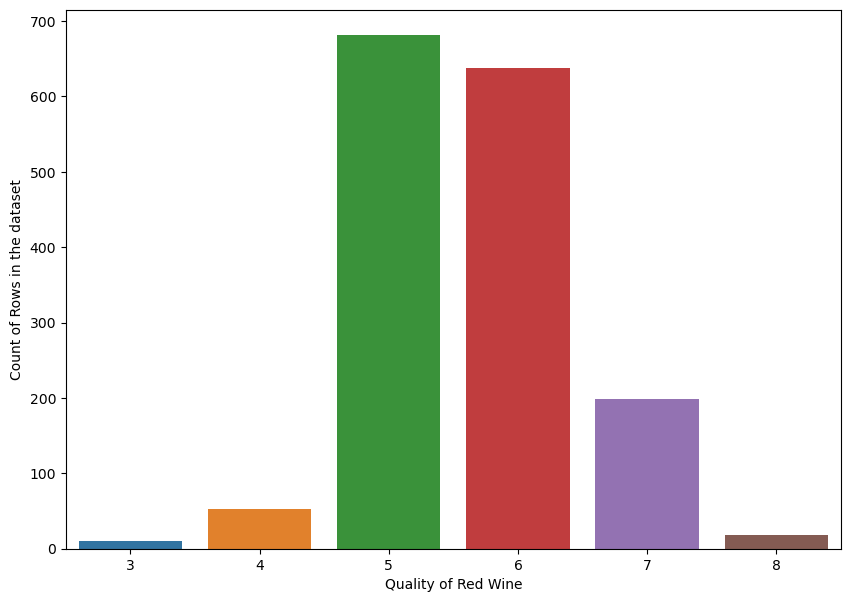

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x='quality',data=df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

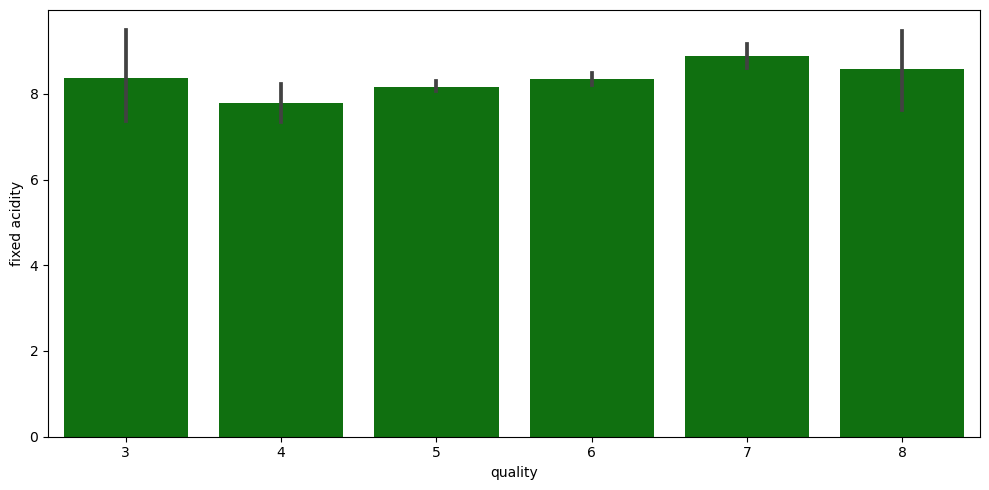

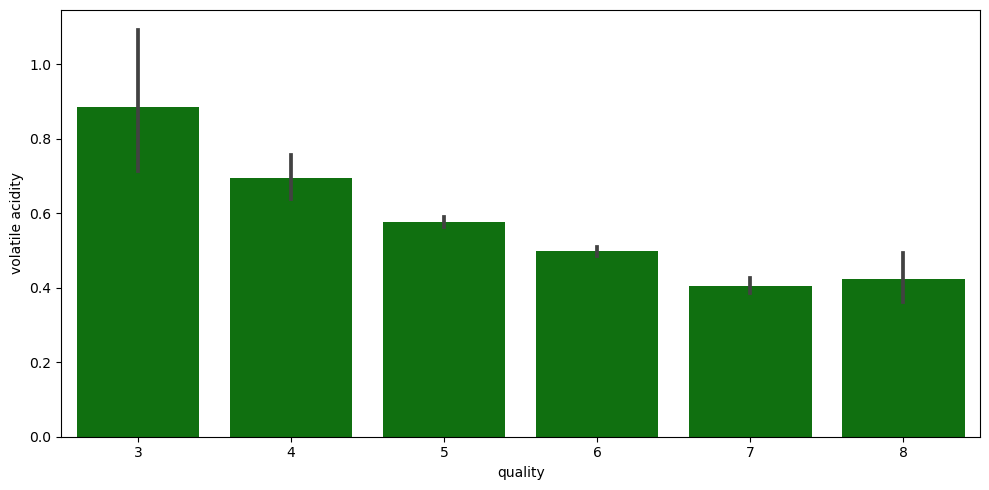

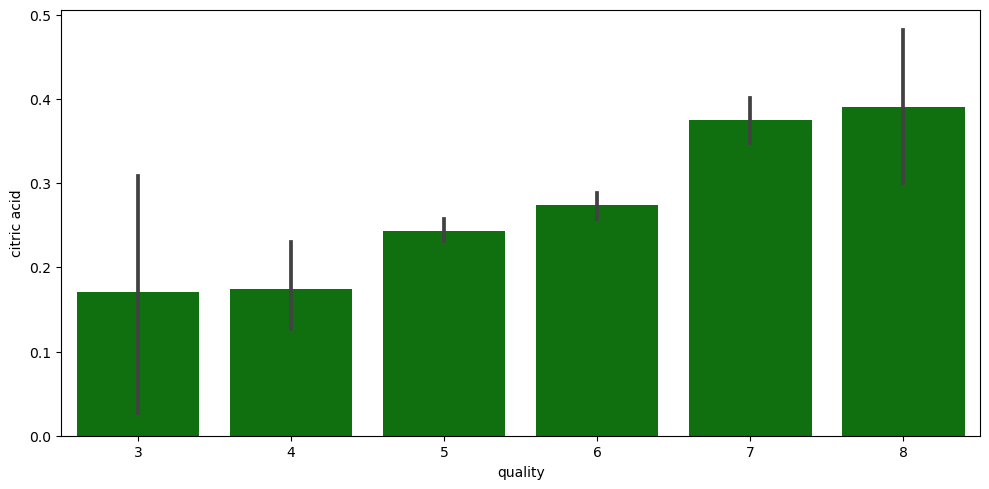

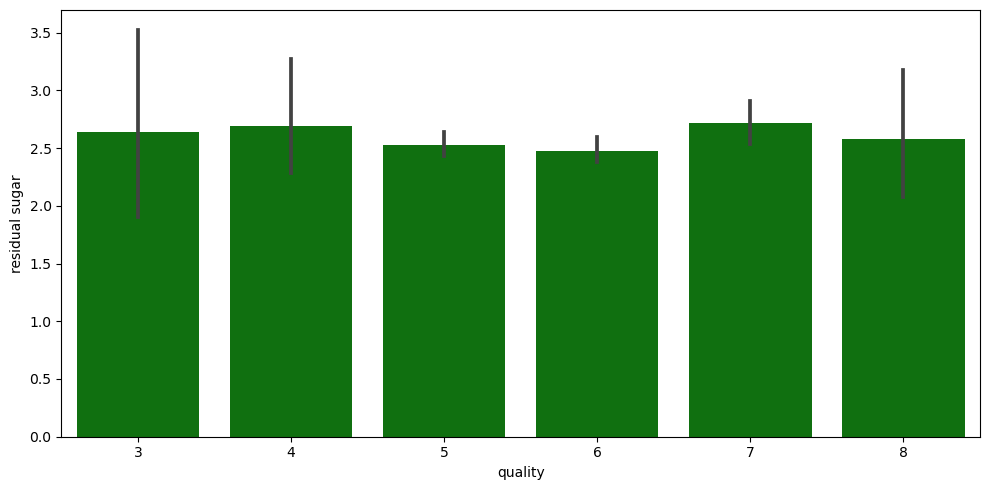

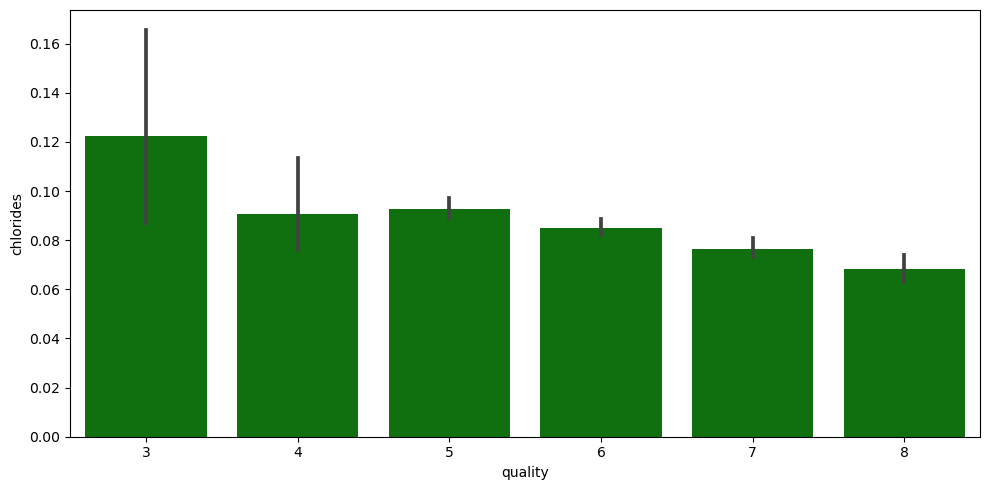

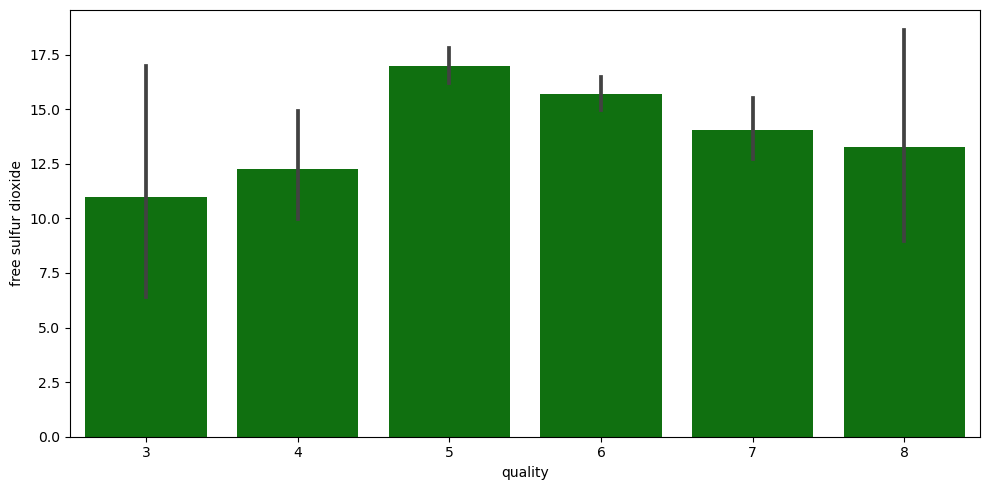

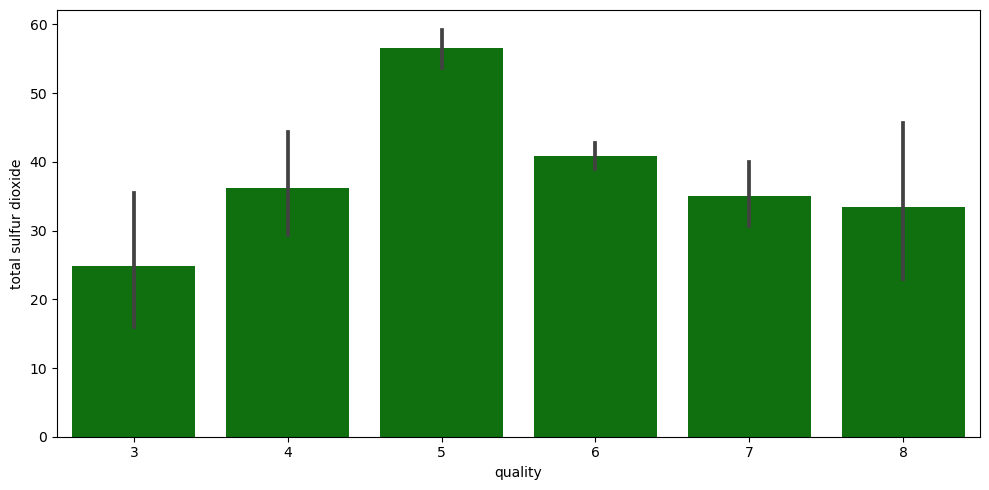

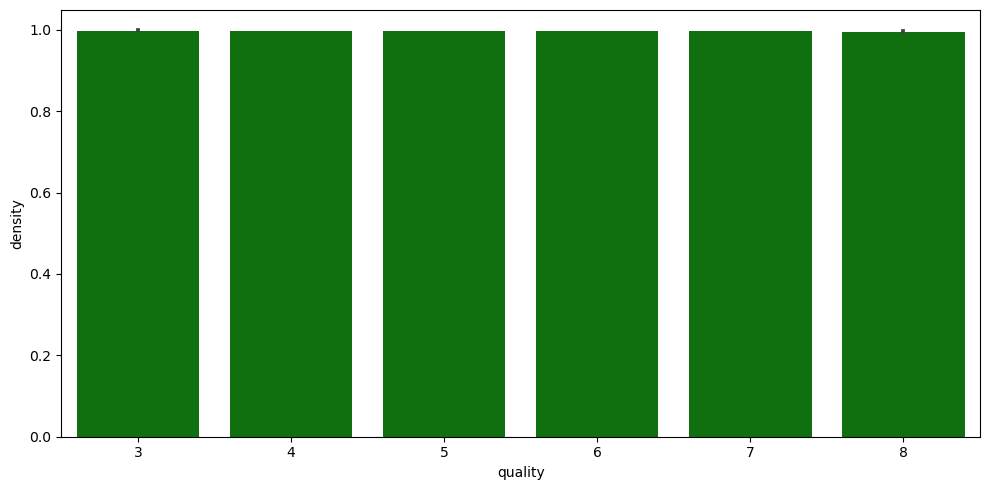

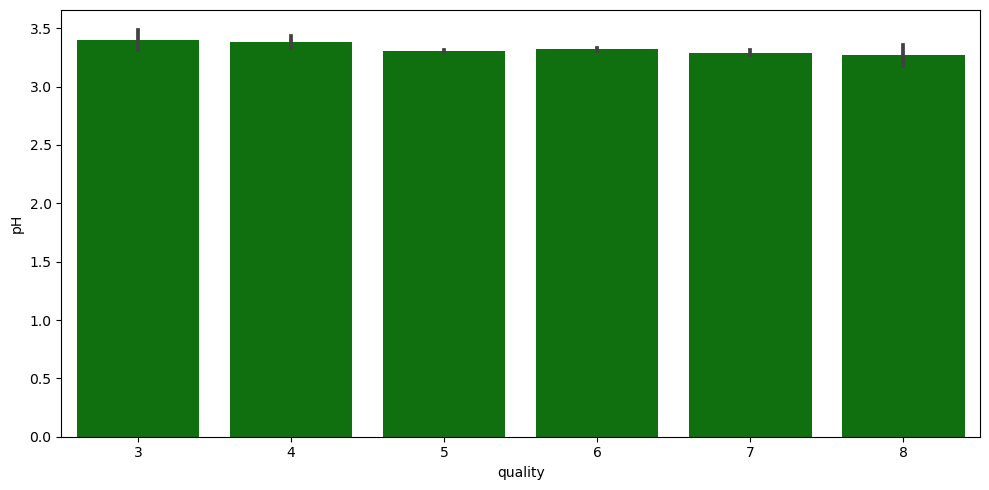

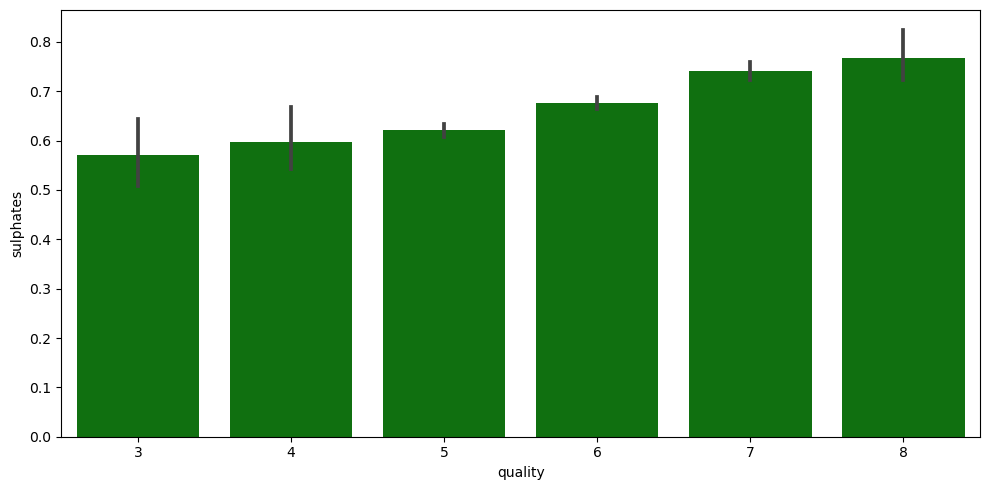

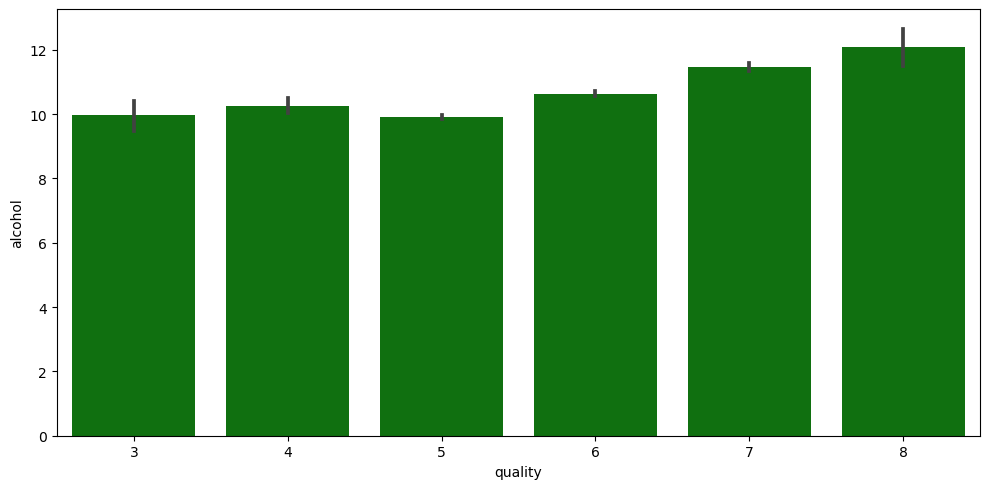

In [12]:
index=0
labels=df['quality']
features = df.drop('quality',axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels,y=col[index],data=df,color="green")
    plt.tight_layout()
    plt.show()

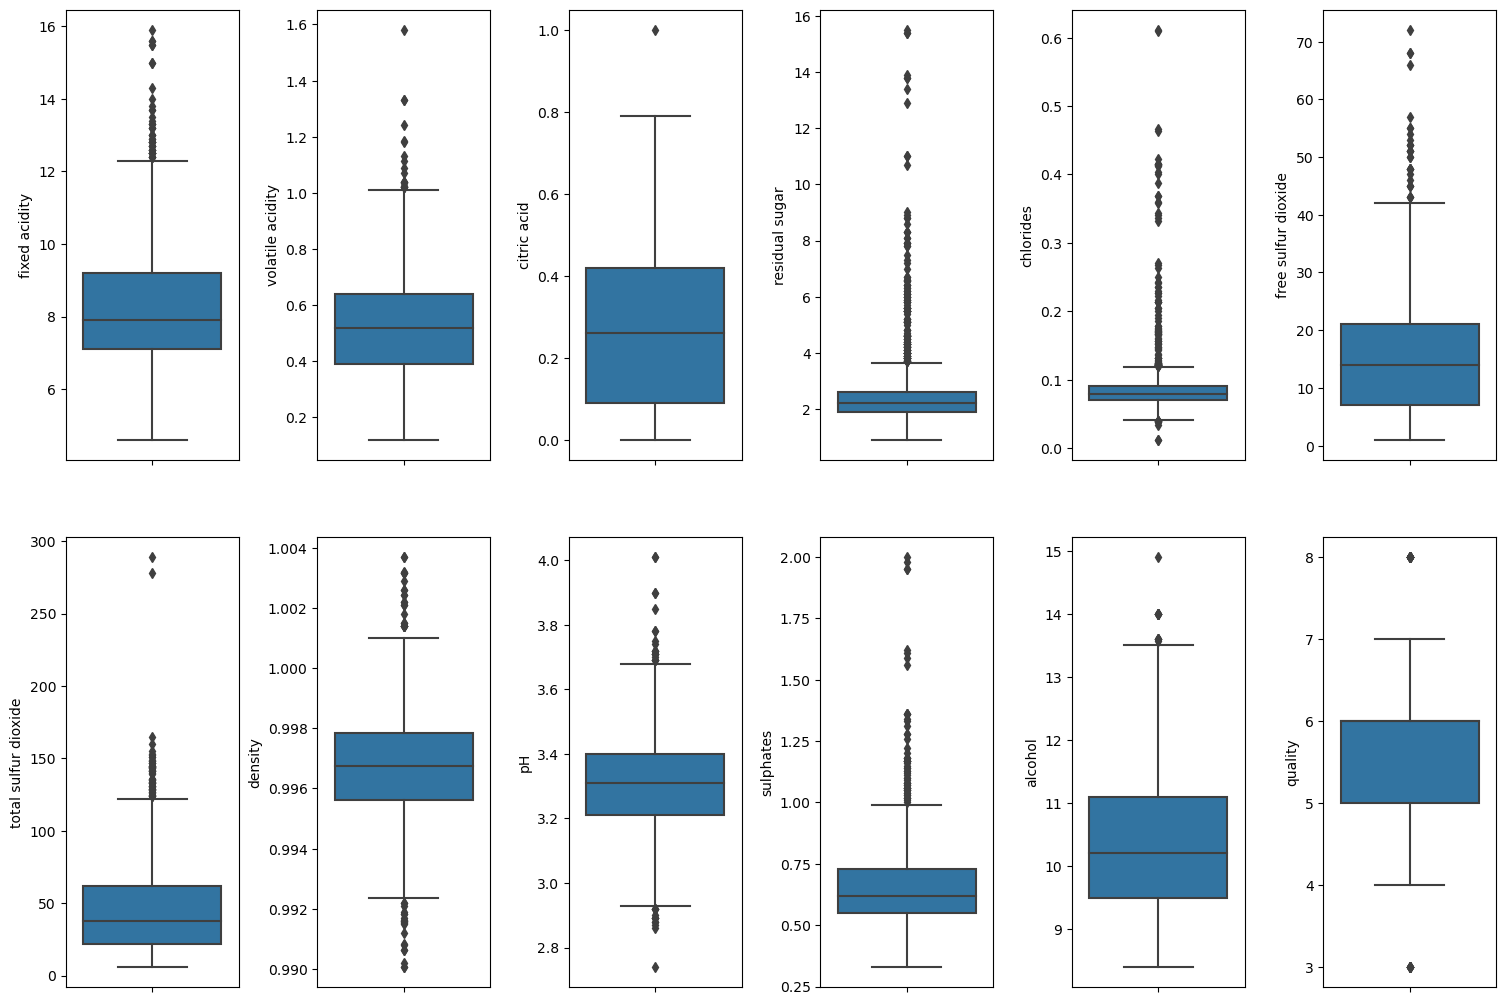

In [18]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()
for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index =index+1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
plt.show()

C:\Users\budha\AppData\Local\Temp\ipykernel_2112\2867258680.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
C:\Users\budha\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\budha\AppData\Local\Temp\ipykernel_2112\2867258680.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt

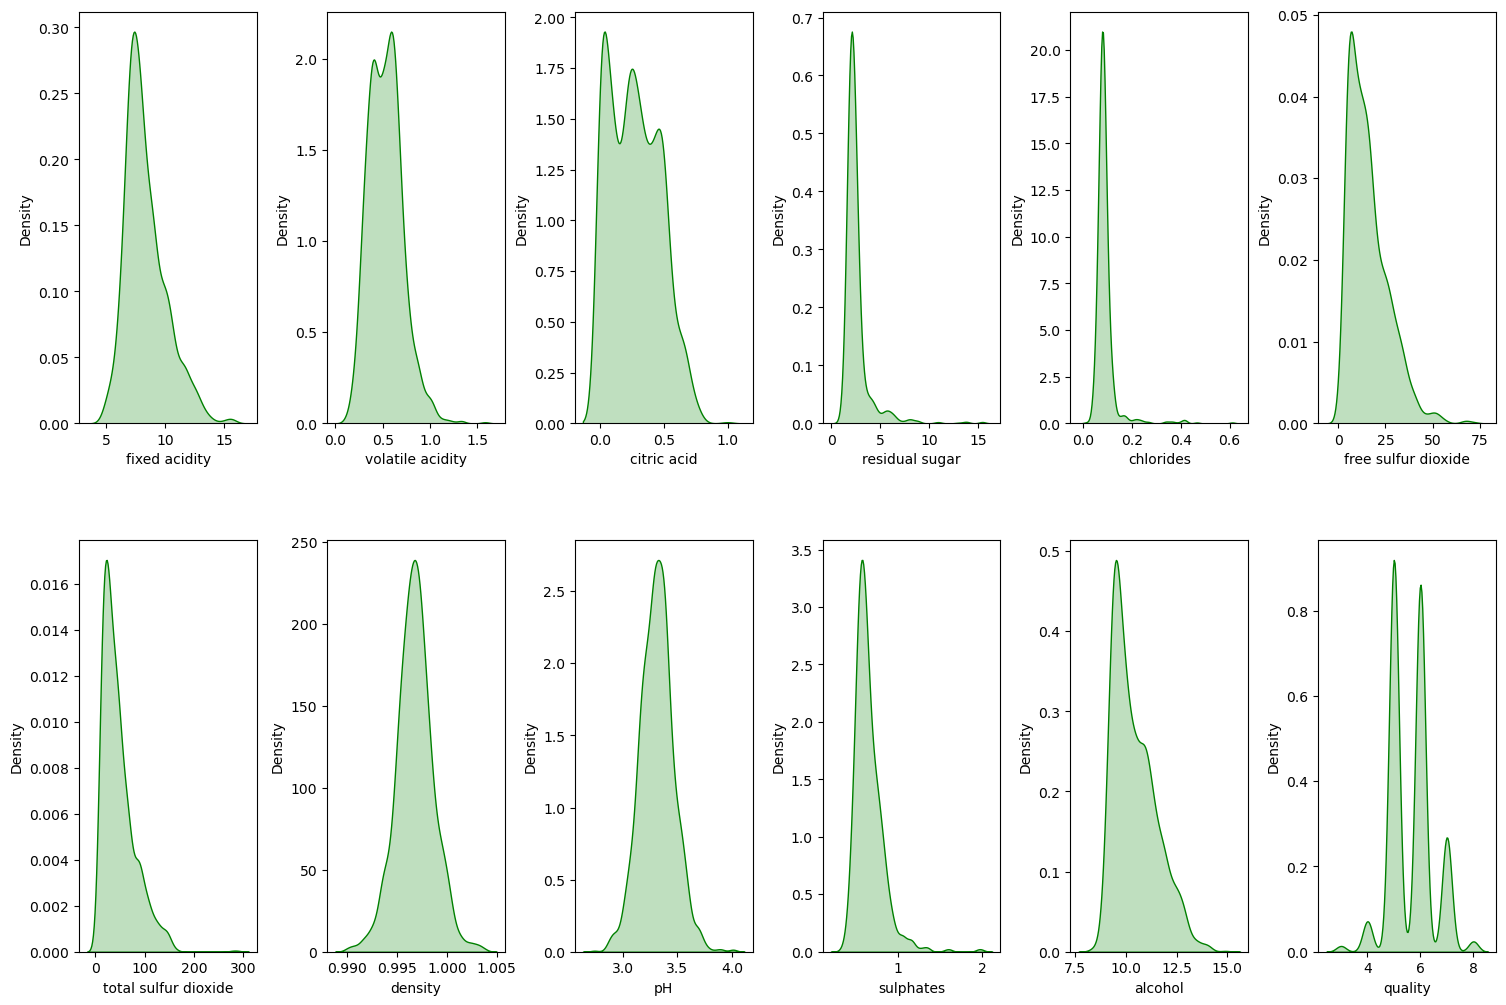

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

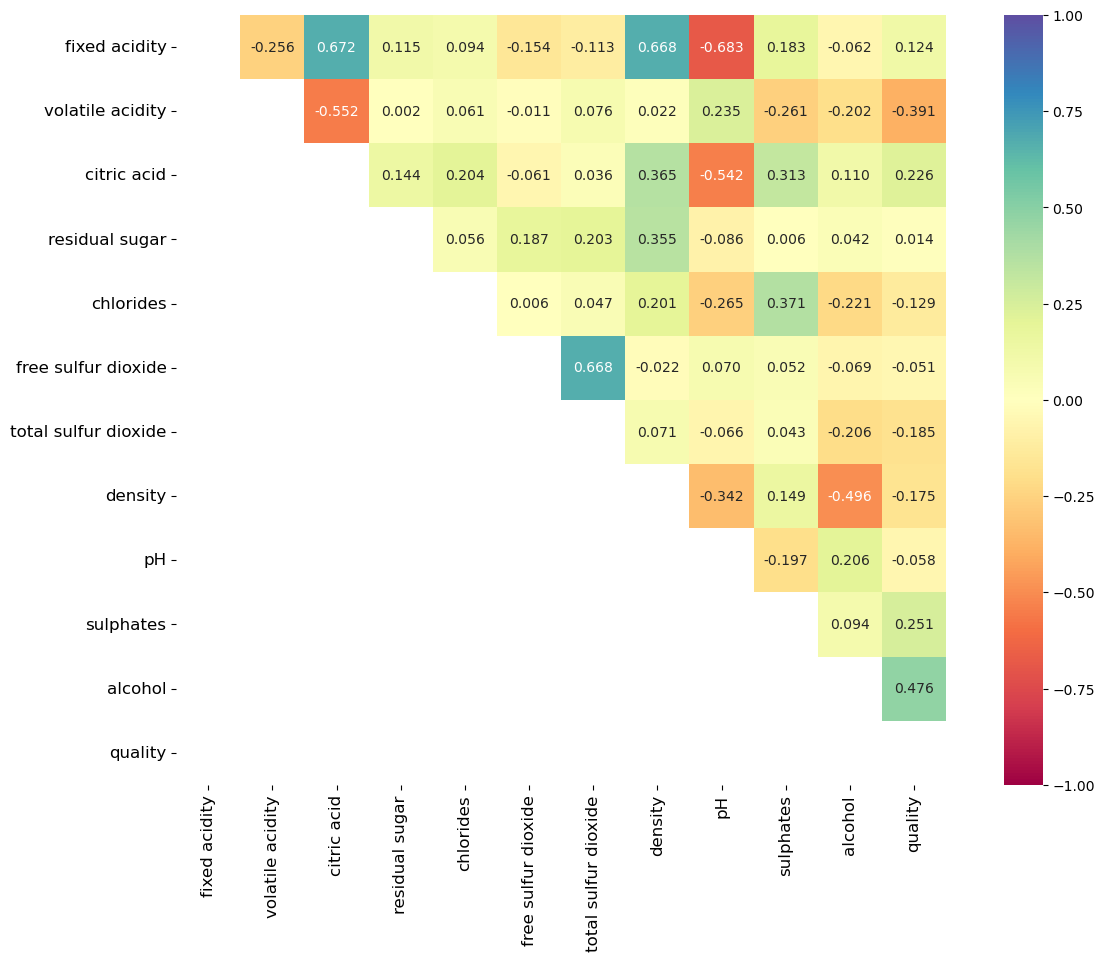

In [14]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
#Outlier Removal

In [15]:
df.shape

(1599, 12)

In [16]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
df.shape

(1451, 12)

In [18]:
data_loss=(1599-1451)/1599*100
data_loss

9.255784865540964

In [19]:
X= df.drop('quality',axis =1)
Y = df['quality']

In [20]:
Y.value_counts()

quality
5    617
6    586
7    185
4     47
8     16
Name: count, dtype: int64

In [21]:
Y.value_counts()

quality
5    617
6    586
7    185
4     47
8     16
Name: count, dtype: int64

In [22]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [23]:
Y=Y.apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64

In [24]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [25]:
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns =X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.282019,0.457346,-0.971261,-0.449401,0.409125,1.815413,0.008992,-1.055489,0.950506,-0.482323,0.077270
1447,-1.464291,0.160562,-0.866477,-0.217323,-0.926828,2.567570,0.246835,-0.927209,1.446794,0.904894,0.762714
1448,-1.221261,-0.076865,-0.709300,-0.101284,-0.258851,1.493059,-0.126918,-0.565690,0.737811,0.827826,0.566873
1449,-1.464291,0.724451,-0.761692,-0.449401,-0.306564,1.815413,0.008992,-0.723125,1.801286,0.519556,-0.216491


In [26]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=21)

In [29]:
def classify(model,X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)
     

In [35]:
# Logistic Regression

model = LogisticRegression()
classify(model,X,Y)

Accuracy Score: 89.69072164948454

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       261
           1       0.50      0.27      0.35        30

    accuracy                           0.90       291
   macro avg       0.71      0.62      0.65       291
weighted avg       0.88      0.90      0.88       291

Cross Validation Score: 87.31863964924754

Accuracy Score - Cross Validation Score is 2.3720820002370004


In [38]:
#support Vector Classifier

model =SVC(C=1.0,kernel='rbf' ,gamma ='auto',random_state=42)
classify(model,X,Y)

Accuracy Score: 91.75257731958763

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       261
           1       0.75      0.30      0.43        30

    accuracy                           0.92       291
   macro avg       0.84      0.64      0.69       291
weighted avg       0.91      0.92      0.90       291

Cross Validation Score: 86.8358810285579

Accuracy Score - Cross Validation Score is 4.916696291029723


In [39]:
#Decision Tree Classifier

model= DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 89.3470790378007

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       261
           1       0.49      0.63      0.55        30

    accuracy                           0.89       291
   macro avg       0.72      0.78      0.75       291
weighted avg       0.91      0.89      0.90       291

Cross Validation Score: 80.83825097760398

Accuracy Score - Cross Validation Score is 8.50882806019672


In [42]:
#Random Forest Classifier

model =RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

Accuracy Score: 94.50171821305841

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       261
           1       0.79      0.63      0.70        30

    accuracy                           0.95       291
   macro avg       0.88      0.81      0.84       291
weighted avg       0.94      0.95      0.94       291

Cross Validation Score: 86.56001895959238

Accuracy Score - Cross Validation Score is 7.941699253466027


In [46]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

Accuracy Score: 90.03436426116839

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       261
           1       0.52      0.43      0.47        30

    accuracy                           0.90       291
   macro avg       0.73      0.69      0.71       291
weighted avg       0.89      0.90      0.90       291

Cross Validation Score: 85.66441521507289

Accuracy Score - Cross Validation Score is 4.369949046095499


In [49]:
#Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,X,Y)


Accuracy Score: 94.84536082474226

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       261
           1       0.89      0.57      0.69        30

    accuracy                           0.95       291
   macro avg       0.92      0.78      0.83       291
weighted avg       0.95      0.95      0.94       291

Cross Validation Score: 87.31816565943834

Accuracy Score - Cross Validation Score is 7.527195165303922


In [53]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [54]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [55]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [56]:
GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [57]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 91.75257731958763


In [66]:
# AUC ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
isp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [67]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [69]:
import joblib
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']